# Main Modelling for Time Series Store forecast 
* By Alex Dance https://www.linkedin.com/in/alex-dance/
* This notebook is one of several notebooks for a project to improve store and product forecasts
1.	EDA – Exploratory Data Analysis – includes working with annual forecasts
2.	Main Modelling
3.	XG Boost modelling by Month
4.	Weighted average
5.	ARIMA – Month and Other Modelling
6.	Deep Learning



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score

In [3]:
#!pip install catboost

In [4]:
class color:  # Testing to make the heading look a liitle more impressive
   BOLD = '\033[1m'

In [5]:
df = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [6]:
split = "2017-01-01"

In [7]:
df['date'] =  pd.to_datetime(df['date'])

# Feature Engineering

In [8]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [9]:
split = "2017-01-01"

In [10]:
df['ItemStoreCombined'] = df['item'].map(str) + '-' + df['store'].map(str) 
# this is used in particular to ensure the rolling forecast data does not leak from 1 item / store combination to the next

In [11]:
df.head()

,date,store,item,sales,ItemStoreCombined
0,2013-01-01,1,1,13,1-1
1,2013-01-02,1,1,11,1-1
2,2013-01-03,1,1,14,1-1
3,2013-01-04,1,1,13,1-1
4,2013-01-05,1,1,10,1-1


In [12]:

df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear

In [13]:
df_roll=df.copy() # for the rolling forecast

In [14]:
# for rolling forecast
df_roll['sales-1'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(1).mean().reset_index(0,drop=True)
df_roll['sales-2'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(2).mean().reset_index(0,drop=True)
df_roll['sales-3'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(3).mean().reset_index(0,drop=True)
df_roll['sales-4'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(4).mean().reset_index(0,drop=True)
df_roll['sales-5'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(5).mean().reset_index(0,drop=True)
df_roll['sales-6'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(6).mean().reset_index(0,drop=True)
df_roll['sales-7'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(7).mean().reset_index(0,drop=True)

In [15]:
df_roll.head(10)

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
0,2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1,11.0,12.0,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1,14.0,12.5,12.666667,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1,13.0,13.5,12.666667,12.75,NaN,NaN,NaN
4,2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1,10.0,11.5,12.333333,12.00,12.2,NaN,NaN
5,2013-01-06,1,1,12,1-1,6,1,1,2013,6,6,1,12.0,11.0,11.666667,12.25,12.0,12.166667,NaN
6,2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143
7,2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714
8,2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571
9,2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286


In [16]:
# ConsideredLooking forward but chose not to

# To check rolling mean is working correctly

In [17]:
df_roll_1_1= df_roll[(df_roll.store==1) & (df_roll.item==1)]

In [18]:
df_roll_2_2 = df_roll[(df_roll.store==2) & (df_roll.item==2)]

In [19]:
df_roll_2_2.head() # to check rolling mean worked. As this is product 2 in store 2 and as Sales--3 has Nan then the rolling mean is not bleeding from earlier data

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
20086,2013-01-01,2,2,41,2-2,1,1,1,2013,1,1,1,41.0,NaN,NaN,NaN,NaN,NaN,NaN
20087,2013-01-02,2,2,33,2-2,2,1,1,2013,2,2,1,33.0,37.0,NaN,NaN,NaN,NaN,NaN
20088,2013-01-03,2,2,46,2-2,3,1,1,2013,3,3,1,46.0,39.5,40.000000,NaN,NaN,NaN,NaN
20089,2013-01-04,2,2,50,2-2,4,1,1,2013,4,4,1,50.0,48.0,43.000000,42.50,NaN,NaN,NaN
20090,2013-01-05,2,2,44,2-2,5,1,1,2013,5,5,1,44.0,47.0,46.666667,43.25,42.8,NaN,NaN


In [20]:
df_roll_1_1.head()  

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
0,2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1,11.0,12.0,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1,14.0,12.5,12.666667,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1,13.0,13.5,12.666667,12.75,NaN,NaN,NaN
4,2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1,10.0,11.5,12.333333,12.00,12.2,NaN,NaN


In [21]:
df_roll = df_roll.dropna()  

In [22]:
df.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1
1,2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1
2,2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1
3,2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1
4,2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1


In [23]:
# could have used the below but it is already built into the modelling process
#df['daily_avg']=df.groupby(['item','store','dayofweek'])['sales'].transform('mean')
#df['monthly_avg']=df.groupby(['item','store','month'])['sales'].transform('mean')

# Set Date as Index

In [24]:
df = df.set_index('date')

In [25]:
df.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1
2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1
2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1
2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1
2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1


# Functions to calculate multiple error metrics
* calculate_error is for more metrics
* calculate errorb is for less metrics

In [26]:
def calculate_error(test_sales, train_sales , test_prediction, train_prediction):
    # https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
    MSE_test = mean_squared_error(y_true=test_sales,  y_pred=test_prediction) # Mean Square Error (MAE)
    MSE_train = mean_squared_error(y_true=train_sales,  y_pred=train_prediction)
    MAE_test = mean_absolute_error(y_true=test_sales,  y_pred=test_prediction) # Mean Absolute Error (MAE)
    MAE_train = mean_absolute_error(y_true=train_sales,  y_pred=train_prediction)
    MAPE = np.mean(np.abs(test_prediction - test_sales  ) **2)  # Mean Absolute Percentage Error (MAPE)
    RMSE  = np.mean(np.sqrt((test_prediction - test_sales) ** 2))    
    return{'MSE_test': MSE_test, 'MSE_train':MSE_train ,'MAE_test': MAE_test, 'MAE_train':MAE_train, 'MAPE':MAPE, 'RMSE':RMSE}

In [27]:
def calculate_errorb(test_sales,  test_prediction):
    # https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
    MSE_test = mean_squared_error(y_true=test_sales,  y_pred=test_prediction) # Mean Square Error (MAE)
    MAE_test = mean_absolute_error(y_true=test_sales,  y_pred=test_prediction) # Mean Absolute Error (MAE)
    MAPE = np.mean(np.abs(test_prediction - test_sales  ) **2)  # Mean Absolute Percentage Error (MAPE)
    RMSE  = np.mean(np.sqrt((test_prediction - test_sales) ** 2))    
    return{'MSE_test': MSE_test ,'MAE_test': MAE_test,  'MAPE':MAPE, 'RMSE':RMSE}

# Rolling Forecast

In [28]:
df_roll_store_item = df.groupby(["store","item"]).rolling('7D').sales.mean() 

In [29]:
print(df_roll_store_item)

store  item  date      
1      1     2013-01-01    13.000000
             2013-01-02    12.000000
             2013-01-03    12.666667
             2013-01-04    12.750000
             2013-01-05    12.200000
                             ...    
10     50    2017-12-27    62.714286
             2017-12-28    62.142857
             2017-12-29    62.000000
             2017-12-30    60.857143
             2017-12-31    61.714286
Name: sales, Length: 913000, dtype: float64


In [30]:
df_roll_store_item =df_roll_store_item.reset_index()

In [31]:
df_roll_store_item.head()

,store,item,date,sales
0,1,1,2013-01-01,13.000000
1,1,1,2013-01-02,12.000000
2,1,1,2013-01-03,12.666667
3,1,1,2013-01-04,12.750000
4,1,1,2013-01-05,12.200000


In [32]:
df_roll_store_item.sample(5)

,store,item,date,sales
845561,10,14,2013-05-04,58.714286
131140,2,22,2017-02-03,79.428571
761137,9,17,2017-03-02,31.000000
534552,6,43,2016-09-22,47.428571
276898,4,2,2016-03-18,58.571429


In [33]:
df_roll_store_item =df_roll_store_item.rename(columns={"sales":"Mean_Amount_7D"})

In [34]:
df_roll_store_item.head()

,store,item,date,Mean_Amount_7D
0,1,1,2013-01-01,13.000000
1,1,1,2013-01-02,12.000000
2,1,1,2013-01-03,12.666667
3,1,1,2013-01-04,12.750000
4,1,1,2013-01-05,12.200000


In [35]:
df_roll_final = df_roll.merge(df_roll_store_item, left_on=['date','store','item'], right_on=['date','store','item'] )

In [36]:
df_roll_final_7days = df_roll_final[(df_roll_final.date >= '2017-01-01') & (df_roll_final.date < '2017-01-08')]

In [37]:
df_roll_final_7days.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,Mean_Amount_7D
1455,2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52,19.0,16.5,19.000000,19.50,18.8,17.333333,17.142857,17.142857
1456,2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1,15.0,17.0,16.000000,18.00,18.6,18.166667,17.000000,17.000000
1457,2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1,10.0,12.5,14.666667,14.50,16.4,17.166667,17.000000,17.000000
1458,2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1,16.0,13.0,13.666667,15.00,14.8,16.333333,17.000000,17.000000
1459,2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1,14.0,15.0,13.333333,13.75,14.8,14.666667,16.000000,16.000000


In [38]:
df_roll_final_7days.sum()

store                                                            19250
item                                                             89250
sales                                                           140121
ItemStoreCombined    1-11-11-11-11-11-11-11-21-21-21-21-21-21-21-31...
dayofweek                                                        10500
quarter                                                           3500
month                                                             3500
year                                                           7059500
dayofyear                                                        14000
dayofmonth                                                       14000
weekofyear                                                       29000
sales-1                                                         140121
sales-2                                                         140722
sales-3                                                         141356
sales-

In [39]:
df_roll_final.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,Mean_Amount_7D
0,2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,11.857143
1,2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,11.285714
2,2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,11.428571
3,2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,10.714286
4,2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,10.142857


In [40]:
df_roll_final = df_roll_final.drop (['sales-1', 'sales-2','sales-3', 'sales-4', 'sales-5', 'sales-6',  'sales-7'],axis=1)

# Splitting and make Test Train and Main Tracking Option

In [41]:
df_train = df[ :split ] 
df_test = df[split : ] 

In [42]:
# df_test_final will be the collated way of comparing the sales and all the forecasting options. 
# Every time a new model is run it will be added to this
df_test_final = df_test.copy()

In [43]:
df_test_final =df_test_final.drop (['dayofweek', 'quarter','month', 'year', 'dayofyear', 'weekofyear'],axis=1)

In [44]:
df_test.sum()

store                                                          1003750
item                                                           4653750
sales                                                         10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year                                                         368102500
dayofyear                                                     33397500
dayofmonth                                                     2869000
weekofyear                                                     4849000
dtype: object

In [45]:
df_test.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52
2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1
2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1
2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1
2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1


In [46]:
y_train = df_train.loc[:,'sales']
y_test= df_test.loc[:,'sales']
X_train = df_train.drop (['sales'],axis=1) 
X_test = df_test.drop (['sales'],axis=1)


In [47]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(731000,)
(182500,)
(731000, 10)
(182500, 10)


In [48]:
X_train.head()

,store,item,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,
2013-01-01,1,1,1-1,1,1,1,2013,1,1,1
2013-01-02,1,1,1-1,2,1,1,2013,2,2,1
2013-01-03,1,1,1-1,3,1,1,2013,3,3,1
2013-01-04,1,1,1-1,4,1,1,2013,4,4,1
2013-01-05,1,1,1-1,5,1,1,2013,5,5,1


In [49]:
y_train.head()

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
Name: sales, dtype: int64

# Add Rolling 

In [50]:
df_test_final = df_test_final.merge(df_roll_store_item, left_on=['date','store','item'], right_on=['date','store','item'] )

In [51]:
df_test_final.head()

,date,store,item,sales,ItemStoreCombined,dayofmonth,Mean_Amount_7D
0,2017-01-01,1,1,19,1-1,1,17.142857
1,2017-01-02,1,1,15,1-1,2,17.000000
2,2017-01-03,1,1,10,1-1,3,17.000000
3,2017-01-04,1,1,16,1-1,4,17.000000
4,2017-01-05,1,1,14,1-1,5,16.000000


# Weighted and SMA

In [52]:
df_roll.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
6,2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143
7,2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714
8,2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571
9,2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286
10,2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857


In [53]:
df_weighted = df_roll.copy() 

In [54]:
df_weighted['date'] =  pd.to_datetime(df_weighted['date'])

In [55]:
df_weighted = df_weighted.set_index('date')

In [56]:
df_weighted.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
date,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857


In [57]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [58]:
wma10 = df_weighted['sales'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

In [59]:
wma10.head(20)

date
2013-01-07          NaN
2013-01-08          NaN
2013-01-09          NaN
2013-01-10          NaN
2013-01-11          NaN
2013-01-12          NaN
2013-01-13          NaN
2013-01-14          NaN
2013-01-15          NaN
2013-01-16     8.509091
2013-01-17     9.781818
2013-01-18     9.309091
2013-01-19    10.872727
2013-01-20    11.781818
2013-01-21    11.309091
2013-01-22    10.672727
2013-01-23    10.400000
2013-01-24     9.963636
2013-01-25    10.690909
2013-01-26    10.890909
Name: sales, dtype: float64

In [60]:
df_weighted['10-day-WMA'] = wma10

In [61]:
df_weighted.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,NaN
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,NaN
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,NaN
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,NaN
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,NaN


In [62]:
wma10.head()

date
2013-01-07   NaN
2013-01-08   NaN
2013-01-09   NaN
2013-01-10   NaN
2013-01-11   NaN
Name: sales, dtype: float64

In [63]:
wma10.sample(5)

date
2014-06-14     39.036364
2013-01-25     34.472727
2016-09-15     36.254545
2016-05-16    114.672727
2017-11-30     35.327273
Name: sales, dtype: float64

In [64]:
df_weighted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 910000 entries, 2013-01-07 to 2017-12-31
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   store              910000 non-null  int64  
 1   item               910000 non-null  int64  
 2   sales              910000 non-null  int64  
 3   ItemStoreCombined  910000 non-null  object 
 4   dayofweek          910000 non-null  int64  
 5   quarter            910000 non-null  int64  
 6   month              910000 non-null  int64  
 7   year               910000 non-null  int64  
 8   dayofyear          910000 non-null  int64  
 9   dayofmonth         910000 non-null  int64  
 10  weekofyear         910000 non-null  int64  
 11  sales-1            910000 non-null  float64
 12  sales-2            910000 non-null  float64
 13  sales-3            910000 non-null  float64
 14  sales-4            910000 non-null  float64
 15  sales-5            910000 non-null 

In [65]:
df_weighted.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,NaN
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,NaN
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,NaN
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,NaN
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,NaN


In [66]:
df_weighted.tail()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2017-12-27,10,50,63,50-10,2,4,12,2017,361,27,52,63.0,52.0,51.666667,57.75,60.2,62.666667,62.714286,60.000000
2017-12-28,10,50,59,50-10,3,4,12,2017,362,28,52,59.0,61.0,54.333333,53.50,58.0,60.000000,62.142857,59.872727
2017-12-29,10,50,74,50-10,4,4,12,2017,363,29,52,74.0,66.5,65.333333,59.25,57.6,60.666667,62.000000,62.363636
2017-12-30,10,50,62,50-10,5,4,12,2017,364,30,52,62.0,68.0,65.000000,64.50,59.8,58.333333,60.857143,62.309091
2017-12-31,10,50,82,50-10,6,4,12,2017,365,31,52,82.0,72.0,72.666667,69.25,68.0,63.500000,61.714286,65.690909


In [67]:
df_weighted_7days = df_weighted[(df_weighted.index >= '2017-01-01')] 

In [68]:
df_weighted_7days = df_weighted_7days[(df_weighted_7days.index < '2017-01-08')]

In [69]:
df_weighted_7days.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52,19.0,16.5,19.000000,19.50,18.8,17.333333,17.142857,17.672727
2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1,15.0,17.0,16.000000,18.00,18.6,18.166667,17.000000,17.236364
2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1,10.0,12.5,14.666667,14.50,16.4,17.166667,17.000000,16.000000
2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1,16.0,13.0,13.666667,15.00,14.8,16.333333,17.000000,15.909091
2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1,14.0,15.0,13.333333,13.75,14.8,14.666667,16.000000,15.527273


In [70]:
RMSE_Weighted_10 =  np.mean(np.sqrt((df_weighted_7days['10-day-WMA'] - df_weighted_7days['sales']) ** 2))    

5.710327272727286


In [72]:
df_weighted.head(20)

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,NaN
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,NaN
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,NaN
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,NaN
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,NaN
2013-01-12,1,1,7,1-1,5,1,1,2013,12,12,2,7.0,8.0,8.333333,9.25,9.2,9.333333,9.714286,NaN
2013-01-13,1,1,10,1-1,6,1,1,2013,13,13,2,10.0,8.5,8.666667,8.75,9.4,9.333333,9.428571,NaN
2013-01-14,1,1,12,1-1,0,1,1,2013,14,14,3,12.0,11.0,9.666667,9.50,9.4,9.833333,9.714286,NaN
2013-01-15,1,1,5,1-1,1,1,1,2013,15,15,3,5.0,8.5,9.000000,8.50,8.6,8.666667,9.142857,NaN


In [73]:
sma10 = df_weighted['sales'].rolling(10).mean()


In [74]:
df_weighted['sma10'] = sma10

In [75]:
df_weighted_short = df_weighted[split : "2017-03-30"] 
df_weighted_short_1_1 =  df_weighted_short[(df_weighted_short.store==1) & (df_weighted_short.item==1)]

In [76]:
df_weighted_short_1_1.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA,sma10
date,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52,19.0,16.5,19.000000,19.50,18.8,17.333333,17.142857,17.672727,17.4
2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1,15.0,17.0,16.000000,18.00,18.6,18.166667,17.000000,17.236364,16.8
2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1,10.0,12.5,14.666667,14.50,16.4,17.166667,17.000000,16.000000,16.5
2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1,16.0,13.0,13.666667,15.00,14.8,16.333333,17.000000,15.909091,16.1
2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1,14.0,15.0,13.333333,13.75,14.8,14.666667,16.000000,15.527273,15.9


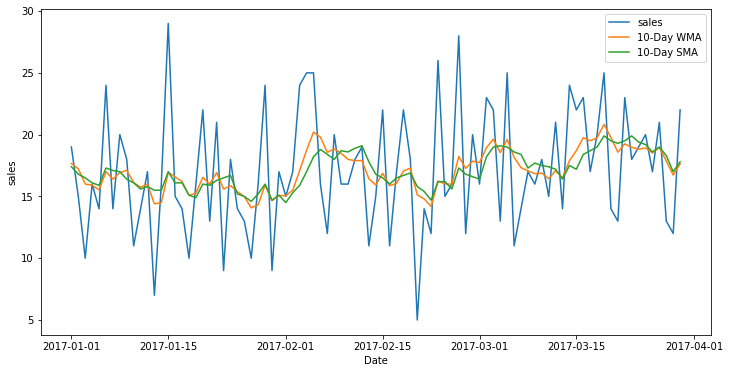

In [77]:
plt.figure(figsize = (12,6))
plt.plot(df_weighted_short_1_1['sales'], label="sales")
plt.plot(df_weighted_short_1_1['10-day-WMA'], label="10-Day WMA")
plt.plot(df_weighted_short_1_1['sma10'], label="10-Day SMA")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend()
plt.show()

# XG Boost

In [78]:
XG_model = xgb.XGBRegressor(n_estimators=1000) # Works


In [79]:
X_test = X_test.drop (['ItemStoreCombined'],axis=1)
X_train = X_train.drop (['ItemStoreCombined'],axis=1)

In [80]:
X_test.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52
2017-01-02,1,1,0,1,1,2017,2,2,1
2017-01-03,1,1,1,1,1,2017,3,3,1
2017-01-04,1,1,2,1,1,2017,4,4,1
2017-01-05,1,1,3,1,1,2017,5,5,1


In [81]:
y_test.head()

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
Name: sales, dtype: int64

In [82]:
y_test.sum()

10733740

In [83]:
%%time
XG_model.fit(X_train, y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=50,verbose=False)


Wall time: 3min 26s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

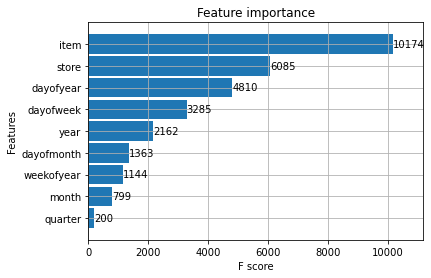

In [84]:
_ = plot_importance(XG_model, height=0.9)

In [85]:
XG_test_prediction = XG_model.predict(X_test)

In [86]:
XG_test_all =X_test.copy()
XG_train_all =X_train.copy()
XG_test_all['XG prediction'] = XG_model.predict(X_test)
XG_train_all['XG prediction'] =XG_model.predict(X_train)
XG_test_all['sales'] = y_test
XG_train_all['sales'] = y_train
df_xg_all = pd.concat([XG_test_all, XG_train_all], sort=False)

In [87]:
RMSE_XG_initial  = np.mean(np.sqrt((XG_test_all['XG prediction'] - XG_test_all['sales']) ** 2)) 
print(RMSE_XG_initial)

6.313282440530437


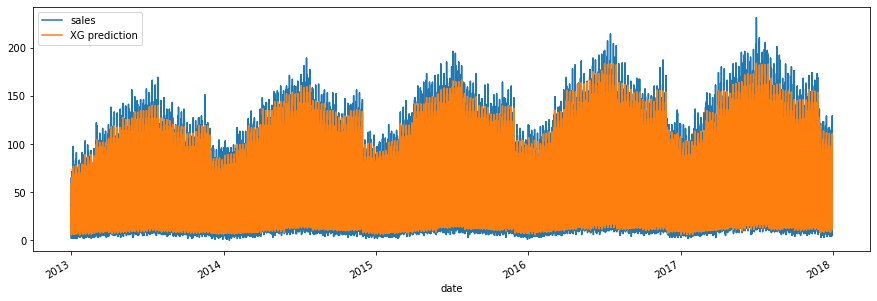

In [88]:
_ = df_xg_all[['sales','XG prediction']].plot(figsize=(15, 5))
# too many stores and products for graph to be useful apart form seeing the outliers
# when see the blue this is the outliers
# there are very few super low sales days
# there are plenty of days that are very high - which are good for business but hard to forecast

In [89]:
df_xg_all.sample(10)

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2014-06-27,4,39,4,2,6,2014,178,27,26,56.165901,64
2013-12-03,8,32,1,4,12,2013,337,3,49,31.100571,30
2014-09-28,10,19,6,3,9,2014,271,28,39,54.428070,55
2015-09-03,4,26,3,3,9,2015,246,3,36,51.597439,49
2014-11-09,6,49,6,4,11,2014,313,9,45,25.896606,25
2014-07-22,1,35,1,3,7,2014,203,22,30,67.223183,69
2014-07-04,2,14,4,3,7,2014,185,4,27,98.670784,84
2016-01-08,7,3,4,1,1,2016,8,8,1,21.068085,17
2016-02-05,5,41,4,1,2,2016,36,5,5,14.385829,9


In [90]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693301,14


In [91]:
XG_test_all['sales']

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
              ..
2017-12-27    63
2017-12-28    59
2017-12-29    74
2017-12-30    62
2017-12-31    82
Name: sales, Length: 182500, dtype: int64

In [92]:
XG_test_all['XG prediction']

date
2017-01-01    17.318481
2017-01-02    12.165764
2017-01-03    13.705684
2017-01-04    13.153199
2017-01-05    15.693301
                ...    
2017-12-27    61.210590
2017-12-28    64.114296
2017-12-29    66.711143
2017-12-30    73.019928
2017-12-31    70.656944
Name: XG prediction, Length: 182500, dtype: float32

In [93]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693301,14


In [94]:
df_test_all_1_1 = XG_test_all[(XG_test_all.store==1)&(XG_test_all.item==1)]

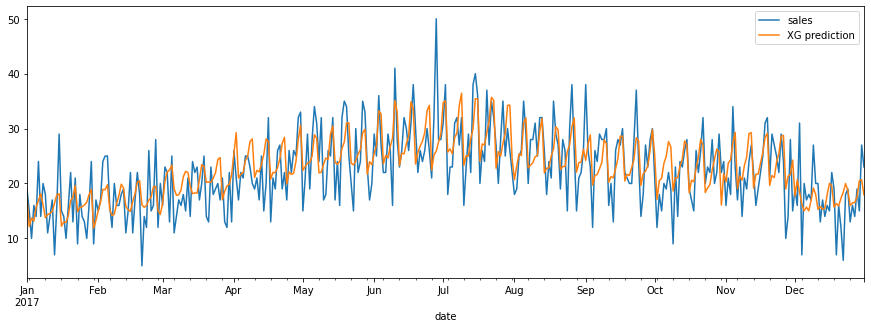

In [95]:
_ = df_test_all_1_1[['sales','XG prediction']].plot(figsize=(15, 5))

In [96]:
df_test_all_2_1 = XG_test_all[(XG_test_all.store==2)&(XG_test_all.item==1)]

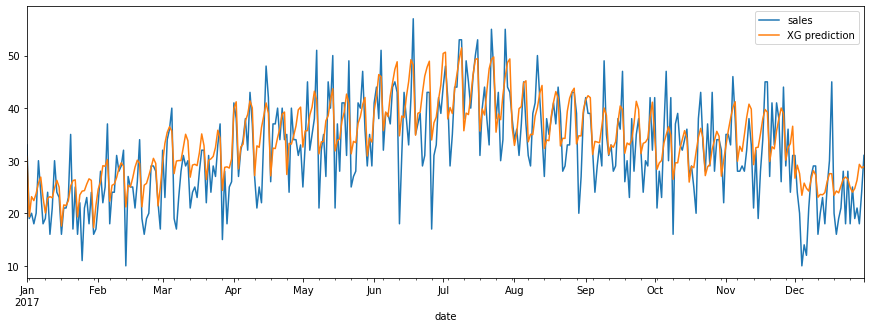

In [97]:
_ = df_test_all_2_1[['sales','XG prediction']].plot(figsize=(15, 5))

In [98]:
df_test_all_2_2 = XG_test_all[(XG_test_all.store==2)&(XG_test_all.item==2)]

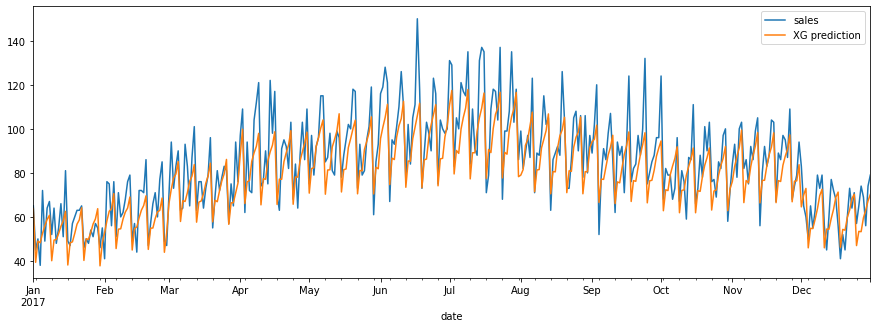

In [99]:
_ = df_test_all_2_2[['sales','XG prediction']].plot(figsize=(15, 5))

In [100]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693301,14


In [101]:
# This calls the error calculating function
XG_Results= calculate_error(XG_test_all['sales'],XG_train_all['sales'],XG_test_all['XG prediction'],XG_train_all['XG prediction'])

In [102]:
print(XG_Results)

{'MSE_test': 68.19063594011101, 'MSE_train': 50.35437630012332, 'MAE_test': 6.313282440530437, 'MAE_train': 5.470699002596651, 'MAPE': 68.1906359401211, 'RMSE': 6.313282440530437}


In [103]:
print(color.BOLD +"XG Boost Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",XG_Results['MSE_test'])
print("MSE_train",XG_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",XG_Results['MAE_test'])
print("MAE_train",XG_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",XG_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",XG_Results['RMSE'])


XG Boost Results 

Mean Squared Error -MSE
MSE_test 68.19063594011101
MSE_train 50.35437630012332
 
Mean Absolute Error - MAE
MAE_test 6.313282440530437
MAE_train 5.470699002596651
 
Mean Absolute Percentage Error - MPE
MAPE 68.1906359401211
 
Root Mean Squared Error -RMSE
RMSE 6.313282440530437


In [104]:
XGaccuracy = accuracy_score(XG_test_all['sales'], XG_test_all['XG prediction'].round()) 
print("Accuracy: %.2f%%" % (XGaccuracy * 100.0))
# This accuracy score does not relfect the accuracy of the result. Instead I looked at the forecasts. I have therefore not used accuracy score further and instead used RMSE and others/

Accuracy: 5.52%


In [105]:
XG_test_all['error'] = XG_test_all['sales'] - XG_test_all['XG prediction']
XG_test_all['abs_error'] = XG_test_all['error'].apply(np.abs)
XG_test_all['abs_error_percent'] = (XG_test_all['abs_error'] / XG_test_all['sales'])*100
error_by_day = XG_test_all.groupby(['year','month','dayofmonth']).mean()[['sales','XG prediction','error','abs_error','store','item']]

In [106]:
error_by_day.sort_values('error', ascending=True).head(5)

sales  XG prediction     error  abs_error  store  item
year month dayofmonth                                                         
2017 3     2           52.652      52.891190 -0.239190   5.677345    5.5  25.5
     1     1           47.418      47.469193 -0.051192   4.475669    5.5  25.5
     2     27          35.100      35.100025 -0.000024   4.815144    5.5  25.5
           6           35.168      35.000359  0.167643   5.030515    5.5  25.5
     3     20          41.790      41.618835  0.171166   5.325778    5.5  25.5

In [107]:
df_xg_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693301,14


In [108]:
XG_test_all['error']

date
2017-01-01     1.681519
2017-01-02     2.834236
2017-01-03    -3.705684
2017-01-04     2.846801
2017-01-05    -1.693301
                ...    
2017-12-27     1.789410
2017-12-28    -5.114296
2017-12-29     7.288857
2017-12-30   -11.019928
2017-12-31    11.343056
Name: error, Length: 182500, dtype: float64

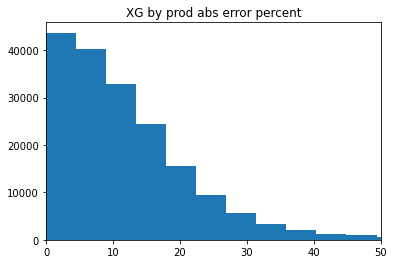

In [109]:

num_bins = 100
plt.title('XG by prod abs error percent')
plt.hist(XG_test_all['abs_error_percent'], bins =num_bins)
plt.xlim((0,50))
plt.show()


In [110]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales,error,abs_error,abs_error_percent
date,,,,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19,1.681519,1.681519,8.850098
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15,2.834236,2.834236,18.894908
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10,-3.705684,3.705684,37.056837
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16,2.846801,2.846801,17.792505
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693301,14,-1.693301,1.693301,12.095009


In [111]:
XG_test_all.abs_error_percent.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.995])
# used this information for presentation in pack to look at the accuracy of the model

0.010     0.184210
0.050     0.921527
0.100     1.852853
0.250     4.686992
0.500     9.881809
0.750    16.986641
0.995    73.927001
Name: abs_error_percent, dtype: float64

In [112]:
df_test_final.sample(5)

,date,store,item,sales,ItemStoreCombined,dayofmonth,Mean_Amount_7D
82353,2017-08-17,6,23,21,23-6,17,26.285714
83870,2017-10-13,10,23,37,23-10,13,34.428571
94914,2017-01-15,1,27,10,27-1,15,11.571429
35379,2017-12-06,7,10,49,10-7,6,44.857143
10633,2017-02-18,10,3,37,3-10,18,32.571429


# Add XG Boost Results to final(master tab)

In [113]:
XG_test_predictions = XG_test_all.copy()

In [114]:
XG_test_predictions.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales,error,abs_error,abs_error_percent
date,,,,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19,1.681519,1.681519,8.850098
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15,2.834236,2.834236,18.894908
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10,-3.705684,3.705684,37.056837
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16,2.846801,2.846801,17.792505
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693301,14,-1.693301,1.693301,12.095009


In [115]:
XG_test_predictions = XG_test_predictions.drop (['dayofweek', 'dayofmonth','quarter','month', 'year', 'dayofyear', 'weekofyear'],axis=1)

In [116]:
df_test_final.sum()

store                                                          1003750
item                                                           4653750
sales                                                         10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth                                                     2869000
Mean_Amount_7D                                             1.07263e+07
dtype: object

In [117]:

df_test_final = df_test_final.merge(XG_test_predictions, left_on=['date','store','item'], right_on=['date','store','item'] )

In [118]:
df_test_final.sample(10)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth,Mean_Amount_7D,XG prediction,sales_y,error,abs_error,abs_error_percent
65651,2017-11-13,10,18,81,18-10,13,113.428571,85.881744,81,-4.881744,4.881744,6.026845
59896,2017-02-06,5,17,20,17-5,6,18.428571,17.838333,20,2.161667,2.161667,10.808334
34765,2017-04-01,6,10,64,10-6,1,60.142857,66.947227,64,-2.947227,2.947227,4.605043
100758,2017-01-19,7,28,60,28-7,19,48.571429,46.549061,60,13.450939,13.450939,22.418232
80584,2017-10-12,1,23,22,23-1,12,31.714286,27.066490,22,-5.066490,5.066490,23.029501
70052,2017-12-04,2,20,33,20-2,4,57.285714,38.097645,33,-5.097645,5.097645,15.447409
41396,2017-06-01,4,12,103,12-4,1,91.428571,94.762184,103,8.237816,8.237816,7.997879
105594,2017-04-20,10,29,91,29-10,20,96.285714,89.018860,91,1.981140,1.981140,2.177077
142971,2017-09-14,2,40,43,40-2,14,40.571429,44.213646,43,-1.213646,1.213646,2.822432
50305,2017-10-28,8,14,98,14-8,28,81.142857,86.433723,98,11.566277,11.566277,11.802323


# Cat Boost

In [119]:
#CatBoostModel=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
CatBoostModel=CatBoostRegressor()

In [120]:
CatBoostModel.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.160239
0:	learn: 26.6674445	test: 31.4452552	best: 31.4452552 (0)	total: 156ms	remaining: 2m 35s
1:	learn: 25.5673805	test: 30.3301255	best: 30.3301255 (1)	total: 251ms	remaining: 2m 5s
2:	learn: 24.8189417	test: 29.5317704	best: 29.5317704 (2)	total: 329ms	remaining: 1m 49s
3:	learn: 24.0899256	test: 28.7837557	best: 28.7837557 (3)	total: 404ms	remaining: 1m 40s
4:	learn: 23.6000275	test: 28.1589199	best: 28.1589199 (4)	total: 483ms	remaining: 1m 36s
5:	learn: 23.1129757	test: 27.6160518	best: 27.6160518 (5)	total: 564ms	remaining: 1m 33s
6:	learn: 22.5858581	test: 27.0727778	best: 27.0727778 (6)	total: 636ms	remaining: 1m 30s
7:	learn: 22.1542857	test: 26.4644770	best: 26.4644770 (7)	total: 717ms	remaining: 1m 28s
8:	learn: 21.7574885	test: 26.0434326	best: 26.0434326 (8)	total: 803ms	remaining: 1m 28s
9:	learn: 21.3366810	test: 25.6039721	best: 25.6039721 (9)	total: 883ms	remaining: 1m 27s
10:	learn: 20.8914073	test: 25.1533762	best: 25.1533762 (10)	total: 965

90:	learn: 10.4269932	test: 12.9467582	best: 12.9467582 (90)	total: 7.79s	remaining: 1m 17s
91:	learn: 10.4070931	test: 12.9199941	best: 12.9199941 (91)	total: 7.88s	remaining: 1m 17s
92:	learn: 10.3741399	test: 12.8764679	best: 12.8764679 (92)	total: 7.97s	remaining: 1m 17s
93:	learn: 10.3506378	test: 12.8438457	best: 12.8438457 (93)	total: 8.05s	remaining: 1m 17s
94:	learn: 10.2757724	test: 12.7539192	best: 12.7539192 (94)	total: 8.14s	remaining: 1m 17s
95:	learn: 10.2116437	test: 12.6810674	best: 12.6810674 (95)	total: 8.22s	remaining: 1m 17s
96:	learn: 10.1679865	test: 12.6283725	best: 12.6283725 (96)	total: 8.29s	remaining: 1m 17s
97:	learn: 10.1468722	test: 12.6015627	best: 12.6015627 (97)	total: 8.38s	remaining: 1m 17s
98:	learn: 10.1314944	test: 12.5807258	best: 12.5807258 (98)	total: 8.47s	remaining: 1m 17s
99:	learn: 10.0746999	test: 12.5110157	best: 12.5110157 (99)	total: 8.56s	remaining: 1m 17s
100:	learn: 10.0085190	test: 12.4303863	best: 12.4303863 (100)	total: 8.65s	rema

181:	learn: 8.6476650	test: 10.5026197	best: 10.5026197 (181)	total: 16.2s	remaining: 1m 12s
182:	learn: 8.6430542	test: 10.4957002	best: 10.4957002 (182)	total: 16.3s	remaining: 1m 12s
183:	learn: 8.6321813	test: 10.4804072	best: 10.4804072 (183)	total: 16.4s	remaining: 1m 12s
184:	learn: 8.6255220	test: 10.4688865	best: 10.4688865 (184)	total: 16.4s	remaining: 1m 12s
185:	learn: 8.6200937	test: 10.4479590	best: 10.4479590 (185)	total: 16.5s	remaining: 1m 12s
186:	learn: 8.6156526	test: 10.4414645	best: 10.4414645 (186)	total: 16.6s	remaining: 1m 12s
187:	learn: 8.6066483	test: 10.4273996	best: 10.4273996 (187)	total: 16.7s	remaining: 1m 12s
188:	learn: 8.6036864	test: 10.4235551	best: 10.4235551 (188)	total: 16.8s	remaining: 1m 12s
189:	learn: 8.5982158	test: 10.4154888	best: 10.4154888 (189)	total: 16.9s	remaining: 1m 11s
190:	learn: 8.5934690	test: 10.4093053	best: 10.4093053 (190)	total: 17s	remaining: 1m 12s
191:	learn: 8.5885207	test: 10.4024417	best: 10.4024417 (191)	total: 17.

272:	learn: 8.1330320	test: 9.6875161	best: 9.6875161 (272)	total: 25.3s	remaining: 1m 7s
273:	learn: 8.1281293	test: 9.6798913	best: 9.6798913 (273)	total: 25.4s	remaining: 1m 7s
274:	learn: 8.1210959	test: 9.6687023	best: 9.6687023 (274)	total: 25.5s	remaining: 1m 7s
275:	learn: 8.1168784	test: 9.6642333	best: 9.6642333 (275)	total: 25.6s	remaining: 1m 7s
276:	learn: 8.1111634	test: 9.6566415	best: 9.6566415 (276)	total: 25.7s	remaining: 1m 7s
277:	learn: 8.1062144	test: 9.6500329	best: 9.6500329 (277)	total: 25.8s	remaining: 1m 7s
278:	learn: 8.0990850	test: 9.6410485	best: 9.6410485 (278)	total: 25.9s	remaining: 1m 6s
279:	learn: 8.0949688	test: 9.6358980	best: 9.6358980 (279)	total: 26s	remaining: 1m 6s
280:	learn: 8.0906038	test: 9.6298550	best: 9.6298550 (280)	total: 26.2s	remaining: 1m 6s
281:	learn: 8.0893967	test: 9.6282970	best: 9.6282970 (281)	total: 26.3s	remaining: 1m 6s
282:	learn: 8.0860193	test: 9.6174767	best: 9.6174767 (282)	total: 26.4s	remaining: 1m 6s
283:	learn: 

364:	learn: 7.8083041	test: 9.2131343	best: 9.2131343 (364)	total: 35.4s	remaining: 1m 1s
365:	learn: 7.8052814	test: 9.2083520	best: 9.2083520 (365)	total: 35.5s	remaining: 1m 1s
366:	learn: 7.8007112	test: 9.1996827	best: 9.1996827 (366)	total: 35.6s	remaining: 1m 1s
367:	learn: 7.7988459	test: 9.1970762	best: 9.1970762 (367)	total: 35.7s	remaining: 1m 1s
368:	learn: 7.7963966	test: 9.1941528	best: 9.1941528 (368)	total: 35.8s	remaining: 1m 1s
369:	learn: 7.7926781	test: 9.1885116	best: 9.1885116 (369)	total: 35.9s	remaining: 1m 1s
370:	learn: 7.7902954	test: 9.1851352	best: 9.1851352 (370)	total: 36s	remaining: 1m
371:	learn: 7.7862030	test: 9.1800731	best: 9.1800731 (371)	total: 36s	remaining: 1m
372:	learn: 7.7841310	test: 9.1775283	best: 9.1775283 (372)	total: 36.1s	remaining: 1m
373:	learn: 7.7826115	test: 9.1754107	best: 9.1754107 (373)	total: 36.2s	remaining: 1m
374:	learn: 7.7817645	test: 9.1749023	best: 9.1749023 (374)	total: 36.3s	remaining: 1m
375:	learn: 7.7804292	test: 9

457:	learn: 7.6142055	test: 8.8937272	best: 8.8937272 (457)	total: 44.3s	remaining: 52.5s
458:	learn: 7.6131803	test: 8.8923993	best: 8.8923993 (458)	total: 44.4s	remaining: 52.3s
459:	learn: 7.6109175	test: 8.8897855	best: 8.8897855 (459)	total: 44.5s	remaining: 52.2s
460:	learn: 7.6094622	test: 8.8848158	best: 8.8848158 (460)	total: 44.6s	remaining: 52.1s
461:	learn: 7.6089165	test: 8.8840852	best: 8.8840852 (461)	total: 44.7s	remaining: 52.1s
462:	learn: 7.6069636	test: 8.8774158	best: 8.8774158 (462)	total: 44.8s	remaining: 52s
463:	learn: 7.6059799	test: 8.8760994	best: 8.8760994 (463)	total: 44.9s	remaining: 51.8s
464:	learn: 7.6054018	test: 8.8752657	best: 8.8752657 (464)	total: 45s	remaining: 51.7s
465:	learn: 7.6040079	test: 8.8731362	best: 8.8731362 (465)	total: 45s	remaining: 51.6s
466:	learn: 7.6032901	test: 8.8702593	best: 8.8702593 (466)	total: 45.1s	remaining: 51.5s
467:	learn: 7.6005332	test: 8.8669115	best: 8.8669115 (467)	total: 45.2s	remaining: 51.4s
468:	learn: 7.59

549:	learn: 7.4935457	test: 8.6741253	best: 8.6741253 (549)	total: 52.3s	remaining: 42.8s
550:	learn: 7.4932003	test: 8.6735710	best: 8.6735710 (550)	total: 52.3s	remaining: 42.6s
551:	learn: 7.4928574	test: 8.6729775	best: 8.6729775 (551)	total: 52.4s	remaining: 42.5s
552:	learn: 7.4925520	test: 8.6725666	best: 8.6725666 (552)	total: 52.5s	remaining: 42.4s
553:	learn: 7.4913746	test: 8.6709104	best: 8.6709104 (553)	total: 52.5s	remaining: 42.3s
554:	learn: 7.4899841	test: 8.6691986	best: 8.6691986 (554)	total: 52.6s	remaining: 42.2s
555:	learn: 7.4886248	test: 8.6673197	best: 8.6673197 (555)	total: 52.7s	remaining: 42.1s
556:	learn: 7.4877445	test: 8.6660010	best: 8.6660010 (556)	total: 52.8s	remaining: 42s
557:	learn: 7.4867271	test: 8.6639784	best: 8.6639784 (557)	total: 52.9s	remaining: 41.9s
558:	learn: 7.4853203	test: 8.6614601	best: 8.6614601 (558)	total: 53s	remaining: 41.8s
559:	learn: 7.4843436	test: 8.6602626	best: 8.6602626 (559)	total: 53.1s	remaining: 41.7s
560:	learn: 7.

641:	learn: 7.4068431	test: 8.5350095	best: 8.5350095 (641)	total: 1m	remaining: 33.6s
642:	learn: 7.4063122	test: 8.5332205	best: 8.5332205 (642)	total: 1m	remaining: 33.5s
643:	learn: 7.4060318	test: 8.5326703	best: 8.5326703 (643)	total: 1m	remaining: 33.4s
644:	learn: 7.4058483	test: 8.5326453	best: 8.5326453 (644)	total: 1m	remaining: 33.3s
645:	learn: 7.4051055	test: 8.5314597	best: 8.5314597 (645)	total: 1m	remaining: 33.2s
646:	learn: 7.4046742	test: 8.5308534	best: 8.5308534 (646)	total: 1m	remaining: 33.1s
647:	learn: 7.4039841	test: 8.5299212	best: 8.5299212 (647)	total: 1m	remaining: 33s
648:	learn: 7.4030195	test: 8.5285135	best: 8.5285135 (648)	total: 1m	remaining: 32.9s
649:	learn: 7.4024733	test: 8.5278036	best: 8.5278036 (649)	total: 1m	remaining: 32.8s
650:	learn: 7.4020542	test: 8.5273777	best: 8.5273777 (650)	total: 1m	remaining: 32.7s
651:	learn: 7.4018483	test: 8.5270686	best: 8.5270686 (651)	total: 1m 1s	remaining: 32.6s
652:	learn: 7.4007390	test: 8.5256646	best

735:	learn: 7.3521166	test: 8.4443057	best: 8.4443057 (735)	total: 1m 8s	remaining: 24.5s
736:	learn: 7.3514579	test: 8.4421566	best: 8.4421566 (736)	total: 1m 8s	remaining: 24.4s
737:	learn: 7.3502219	test: 8.4406131	best: 8.4406131 (737)	total: 1m 8s	remaining: 24.3s
738:	learn: 7.3499201	test: 8.4401357	best: 8.4401357 (738)	total: 1m 8s	remaining: 24.2s
739:	learn: 7.3497244	test: 8.4398340	best: 8.4398340 (739)	total: 1m 8s	remaining: 24.1s
740:	learn: 7.3489712	test: 8.4384309	best: 8.4384309 (740)	total: 1m 8s	remaining: 24s
741:	learn: 7.3483380	test: 8.4372237	best: 8.4372237 (741)	total: 1m 8s	remaining: 23.9s
742:	learn: 7.3479693	test: 8.4366577	best: 8.4366577 (742)	total: 1m 8s	remaining: 23.8s
743:	learn: 7.3477619	test: 8.4362053	best: 8.4362053 (743)	total: 1m 9s	remaining: 23.7s
744:	learn: 7.3473204	test: 8.4346522	best: 8.4346522 (744)	total: 1m 9s	remaining: 23.6s
745:	learn: 7.3470166	test: 8.4342742	best: 8.4342742 (745)	total: 1m 9s	remaining: 23.6s
746:	learn: 

827:	learn: 7.3091659	test: 8.3729984	best: 8.3729984 (827)	total: 1m 16s	remaining: 15.9s
828:	learn: 7.3089101	test: 8.3727272	best: 8.3727272 (828)	total: 1m 16s	remaining: 15.8s
829:	learn: 7.3081512	test: 8.3717884	best: 8.3717884 (829)	total: 1m 16s	remaining: 15.7s
830:	learn: 7.3078343	test: 8.3713664	best: 8.3713664 (830)	total: 1m 16s	remaining: 15.6s
831:	learn: 7.3075132	test: 8.3711252	best: 8.3711252 (831)	total: 1m 16s	remaining: 15.5s
832:	learn: 7.3065997	test: 8.3697949	best: 8.3697949 (832)	total: 1m 16s	remaining: 15.4s
833:	learn: 7.3054993	test: 8.3683157	best: 8.3683157 (833)	total: 1m 17s	remaining: 15.3s
834:	learn: 7.3053015	test: 8.3682029	best: 8.3682029 (834)	total: 1m 17s	remaining: 15.2s
835:	learn: 7.3046317	test: 8.3671849	best: 8.3671849 (835)	total: 1m 17s	remaining: 15.1s
836:	learn: 7.3040442	test: 8.3664817	best: 8.3664817 (836)	total: 1m 17s	remaining: 15.1s
837:	learn: 7.3037025	test: 8.3658751	best: 8.3658751 (837)	total: 1m 17s	remaining: 15s
8

919:	learn: 7.2773324	test: 8.3251748	best: 8.3251748 (919)	total: 1m 24s	remaining: 7.36s
920:	learn: 7.2766338	test: 8.3241528	best: 8.3241528 (920)	total: 1m 24s	remaining: 7.27s
921:	learn: 7.2758910	test: 8.3232909	best: 8.3232909 (921)	total: 1m 24s	remaining: 7.18s
922:	learn: 7.2754660	test: 8.3226281	best: 8.3226281 (922)	total: 1m 24s	remaining: 7.08s
923:	learn: 7.2753724	test: 8.3223050	best: 8.3223050 (923)	total: 1m 25s	remaining: 6.99s
924:	learn: 7.2752865	test: 8.3221810	best: 8.3221810 (924)	total: 1m 25s	remaining: 6.9s
925:	learn: 7.2750003	test: 8.3215207	best: 8.3215207 (925)	total: 1m 25s	remaining: 6.8s
926:	learn: 7.2746710	test: 8.3210636	best: 8.3210636 (926)	total: 1m 25s	remaining: 6.71s
927:	learn: 7.2741573	test: 8.3203780	best: 8.3203780 (927)	total: 1m 25s	remaining: 6.62s
928:	learn: 7.2739386	test: 8.3200124	best: 8.3200124 (928)	total: 1m 25s	remaining: 6.54s
929:	learn: 7.2735182	test: 8.3193922	best: 8.3193922 (929)	total: 1m 25s	remaining: 6.44s
9

In [121]:
catboostpred = CatBoostModel.predict(X_test)

In [122]:
print(catboostpred)

[18.97015739 12.24880464 13.55490003 ... 65.87241969 69.84142329
 72.40937481]


In [123]:
CAT_test_all =X_test.copy()
CAT_train_all =X_train.copy()
CAT_test_all['CAT prediction'] = CatBoostModel.predict(X_test)
CAT_train_all['CAT prediction'] =CatBoostModel.predict(X_train)
CAT_test_all['sales'] = y_test
CAT_train_all['sales'] = y_train
df_CAT_all = pd.concat([CAT_test_all, CAT_train_all], sort=False)


In [124]:
CAT_test_all.sum()

store             1.003750e+06
item              4.653750e+06
dayofweek         5.490000e+05
quarter           4.580000e+05
month             1.191000e+06
year              3.681025e+08
dayofyear         3.339750e+07
dayofmonth        2.869000e+06
weekofyear        4.849000e+06
CAT prediction    1.042023e+07
sales             1.073374e+07
dtype: float64

In [125]:
df_test_all_1_1 = CAT_test_all[(CAT_test_all.store==1)&(CAT_test_all.item==1)]


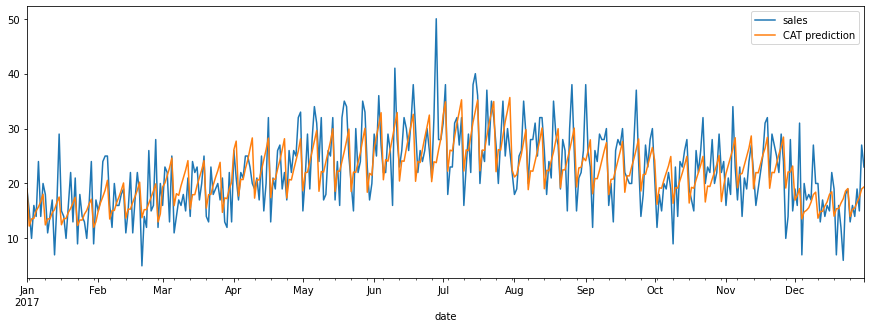

In [126]:
_=df_test_all_1_1[['sales','CAT prediction']].plot(figsize=(15, 5))

In [127]:
CAT_Results= calculate_error(CAT_test_all['sales'],CAT_train_all['sales'],CAT_test_all['CAT prediction'],CAT_train_all['CAT prediction'])

In [128]:
print(color.BOLD +"CAT Boost Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",CAT_Results['MSE_test'])
print("MSE_train",CAT_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",CAT_Results['MAE_test'])
print("MAE_train",CAT_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",CAT_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",CAT_Results['RMSE'])

CAT Boost Results 

Mean Squared Error -MSE
MSE_test 68.78596880421746
MSE_train 52.65575436484306
 
Mean Absolute Error - MAE
MAE_test 6.285698783697776
MAE_train 5.586301226752524
 
Mean Absolute Percentage Error - MPE
MAPE 68.78596880421776
 
Root Mean Squared Error -RMSE
RMSE 6.285698783697764


In [129]:
df_test_final = df_test_final.merge(CAT_test_all, left_on=['date','store','item'], right_on=['date','store','item'] )

In [130]:
df_test_final.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,abs_error_percent,dayofweek,quarter,month,year,dayofyear,dayofmonth_y,weekofyear,CAT prediction,sales
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,8.850098,6,1,1,2017,1,1,52,18.970157,19
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,18.894908,0,1,1,2017,2,2,1,12.248805,15
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,37.056837,1,1,1,2017,3,3,1,13.554900,10
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,17.792505,2,1,1,2017,4,4,1,13.629621,16
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693301,14,-1.693301,...,12.095009,3,1,1,2017,5,5,1,15.007225,14


# Deep AR - 365 Days
This an some other models were run using Amazon Forecast. The process was
* Add train data to Amazon
* Run forecast in Amazon
* Export the forecast to Amazon S3
* It was 1 forecast (appox 182K rows) but Amazon produced it as approx 25 files
* Then in Amazon sagemaker I collated the files and then exported to S3 as just 1 file
* Now here I am uploading the files
* Then adding to the main Foreecast tracking sheet
* Then calculating the accuracy using RMSE and other options
* Printing all the results together


In [131]:
DeepAR = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/Back From Amazon/DeepAR3.csv')

In [132]:
DeepAR.head()

,item_id,date,store_id,p10,p50,p90
0,36,2017-01-01T00:00:00Z,2,84.764282,95.937477,109.807701
1,36,2017-01-02T00:00:00Z,2,51.847923,64.234650,74.925110
2,36,2017-01-03T00:00:00Z,2,64.429222,76.217873,87.928719
3,36,2017-01-04T00:00:00Z,2,64.200394,75.285362,84.700272
4,36,2017-01-05T00:00:00Z,2,65.510262,77.181885,88.940048


In [133]:
DeepAR = DeepAR.replace(to_replace='T00:00:00Z', value='', regex=True)

In [134]:
DeepAR = DeepAR.rename(columns={'p10': 'DeepAR p10','p50': 'DeepAR p50','p90': 'DeepAR p90','store_id': 'store','item_id': 'item'  })

In [135]:
DeepAR['date'] =  pd.to_datetime(DeepAR['date'])

In [136]:
DeepAR.head()

,item,date,store,DeepAR p10,DeepAR p50,DeepAR p90
0,36,2017-01-01,2,84.764282,95.937477,109.807701
1,36,2017-01-02,2,51.847923,64.234650,74.925110
2,36,2017-01-03,2,64.429222,76.217873,87.928719
3,36,2017-01-04,2,64.200394,75.285362,84.700272
4,36,2017-01-05,2,65.510262,77.181885,88.940048


In [137]:
df_test_final = df_test_final.merge(DeepAR, left_on=['date','store','item'], right_on=['date','store','item'] )

In [138]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,month,year,dayofyear,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90
94701,2017-06-16,10,26,71,26-10,16,75.000000,74.861816,71,-3.861816,...,6,2017,167,16,24,75.935378,71,69.461388,79.799980,91.816765
72599,2017-11-26,9,20,73,20-9,26,60.142857,68.094383,73,4.905617,...,11,2017,330,26,47,69.836305,73,57.024677,65.514778,77.636063
148257,2017-03-09,7,41,19,41-7,9,15.857143,14.742128,19,4.257872,...,3,2017,68,9,10,15.513653,19,12.599814,16.395142,20.857508
14385,2017-05-31,10,4,27,4-10,31,34.000000,27.762289,27,-0.762289,...,5,2017,151,31,22,28.495765,27,23.604910,30.034479,38.316113
177024,2017-12-31,5,49,21,49-5,31,17.285714,22.716248,21,-1.716248,...,12,2017,365,31,52,20.022951,21,17.293905,22.893948,29.449919


In [139]:
DeepAR = DeepAR.set_index('date')

In [140]:
DeepAR_test_all = DeepAR [split :]

In [141]:
DeepAR_train_all = DeepAR [ :split]

In [142]:
DeepAR_test_all.head()

,item,store,DeepAR p10,DeepAR p50,DeepAR p90
date,,,,,
2017-01-01,36,2,84.764282,95.937477,109.807701
2017-01-02,36,2,51.847923,64.234650,74.925110
2017-01-03,36,2,64.429222,76.217873,87.928719
2017-01-04,36,2,64.200394,75.285362,84.700272
2017-01-05,36,2,65.510262,77.181885,88.940048


In [143]:
DeepAR_train_all.head()

,item,store,DeepAR p10,DeepAR p50,DeepAR p90
date,,,,,
2017-01-01,36,2,84.764282,95.937477,109.807701
2017-01-01,44,8,27.121500,33.279018,41.295391
2017-01-01,39,10,37.892647,45.340363,55.106323
2017-01-01,5,1,10.796619,16.344246,20.261379
2017-01-01,16,8,23.587189,29.581112,37.055595


In [144]:
DeepAR_test_all['DeepAR p50'] 

date
2017-01-01    95.937477
2017-01-02    64.234650
2017-01-03    76.217873
2017-01-04    75.285362
2017-01-05    77.181885
                ...    
2017-12-27    18.402611
2017-12-28    18.853464
2017-12-29    19.824537
2017-12-30    20.712610
2017-12-31    22.893948
Name: DeepAR p50, Length: 182500, dtype: float64

In [145]:
DeepAR_Results= calculate_errorb(df_test_final['sales_x'],df_test_final['DeepAR p50'])

In [146]:
print(color.BOLD +"DeepAR Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",DeepAR_Results['MSE_test'])
#print("MSE_train",DeepAR_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",DeepAR_Results['MAE_test'])
#print("MAE_train",DeepAR_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",DeepAR_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",DeepAR_Results['RMSE'])


DeepAR Results 

Mean Squared Error -MSE
MSE_test 70.85265737630033
 
Mean Absolute Error - MAE
MAE_test 6.503165773412587
 
Mean Absolute Percentage Error - MPE
MAPE 70.85265737629216
 
Root Mean Squared Error -RMSE
RMSE 6.503165773412618


In [147]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,month,year,dayofyear,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90
139208,2017-05-24,2,39,55,39-2,24,63.714286,64.229309,55,-9.229309,...,5,2017,144,24,21,64.781047,55,57.718719,70.388641,78.802567
6097,2017-09-15,7,2,49,2-7,15,49.000000,47.731018,49,1.268982,...,9,2017,258,15,37,49.434685,49,44.095860,52.133717,60.052242
84987,2017-11-04,3,24,89,24-3,4,90.571429,93.216728,89,-4.216728,...,11,2017,308,4,44,93.927048,89,83.852921,101.707054,116.843323
53638,2017-12-15,7,15,58,15-7,15,50.857143,51.155025,58,6.844975,...,12,2017,349,15,50,53.717495,58,47.715786,58.677322,67.073021
70368,2017-10-16,3,20,43,20-3,16,65.000000,46.321091,43,-3.321091,...,10,2017,289,16,42,45.304396,43,42.277554,51.591618,61.242477


# Prophet - 365 Days

In [148]:
Prophet = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/Back From Amazon/Prophet2.csv')

In [149]:
Prophet.head(10)

,item_id,date,store_id,p10,p50,p90
0,47,2017-01-01T00:00:00Z,3,19.330191,25.191065,30.513657
1,47,2017-01-02T00:00:00Z,3,7.760203,15.420742,19.584054
2,47,2017-01-03T00:00:00Z,3,11.782807,18.574037,24.665435
3,47,2017-01-04T00:00:00Z,3,12.456302,19.199878,26.254035
4,47,2017-01-05T00:00:00Z,3,14.482469,20.452598,27.876129
5,47,2017-01-06T00:00:00Z,3,14.917645,21.120764,27.238577
6,47,2017-01-07T00:00:00Z,3,19.115302,25.396307,31.417771
7,47,2017-01-08T00:00:00Z,3,20.168148,25.559684,30.819291
8,47,2017-01-09T00:00:00Z,3,9.467580,14.973982,19.499602
9,47,2017-01-10T00:00:00Z,3,12.290613,19.536579,25.663957


In [150]:
Prophet = Prophet.replace(to_replace='T00:00:00Z', value='', regex=True)

In [151]:
Prophet = Prophet.rename(columns={'p10': 'Prophet p10','p50': 'Prophet p50','p90': 'Prophet p90','store_id': 'store','item_id': 'item'  })

In [152]:
Prophet.head()

,item,date,store,Prophet p10,Prophet p50,Prophet p90
0,47,2017-01-01,3,19.330191,25.191065,30.513657
1,47,2017-01-02,3,7.760203,15.420742,19.584054
2,47,2017-01-03,3,11.782807,18.574037,24.665435
3,47,2017-01-04,3,12.456302,19.199878,26.254035
4,47,2017-01-05,3,14.482469,20.452598,27.876129


In [153]:
Prophet['date'] =  pd.to_datetime(Prophet['date'])

In [154]:
df_test_final = df_test_final.merge(Prophet, left_on=['date','store','item'], right_on=['date','store','item'] )

In [155]:
df_test_final.sum()

store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                             1.07263e+07
XG prediction                                              1.03962e+07
sales_y                                                       10733740
error                                                           337539
abs_error                                                  1.15217e+06
abs_error_percent                                          2.31512e+06
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [156]:
Prophet = Prophet.set_index('date')

In [157]:
Prophet_test_all = Prophet [split :]
Prophet_train_all = Prophet [ :split]

In [158]:
y_test.head()

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
Name: sales, dtype: int64

In [159]:
y_test.sum()

10733740

In [160]:
Prophet_Results= calculate_errorb(df_test_final['sales_x'],df_test_final['Prophet p50'])

In [161]:
print(color.BOLD +"Prophet Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",Prophet_Results['MSE_test'])
#print("MSE_train",Prophet_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",Prophet_Results['MAE_test'])
#print("MAE_train",Prophet_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",Prophet_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",Prophet_Results['RMSE'])


Prophet Results 

Mean Squared Error -MSE
MSE_test 78.8228684488689
 
Mean Absolute Error - MAE
MAE_test 6.855061314747113
 
Mean Absolute Percentage Error - MPE
MAPE 78.82286844886995
 
Root Mean Squared Error -RMSE
RMSE 6.855061314747093


# Auto 365

In [162]:
Auto = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/Back From Amazon/Autov1.csv')

In [163]:
Auto = Auto.replace(to_replace='T00:00:00Z', value='', regex=True)

In [164]:
Auto = Auto.rename(columns={'p10': 'Auto p10','p50': 'Auto p50','p90': 'Auto p90','store_id': 'store','item_id': 'item'  })

In [165]:
Auto['date'] =  pd.to_datetime(Auto['date'])

In [166]:
df_test_final_Auto = df_test_final.copy()

In [167]:
df_test_final_Auto = df_test_final_Auto.merge(Auto, left_on=['date','store','item'], right_on=['date','store','item'] )

In [168]:
Auto = Auto.set_index('date')

In [169]:
df_test_final_Auto.sample(20)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,Auto p10,Auto p50,Auto p90
1664,2017-07-24,1,5,23,5-1,24,21.571429,22.713078,23,0.286922,...,23,13.068443,19.042076,25.482168,14.322847,19.810834,24.153937,205.747008,224.897069,245.155136
8117,2017-03-29,1,23,20,23-1,29,25.428571,22.149359,20,-2.149359,...,20,20.228035,28.610172,37.422867,20.990958,27.012968,36.362961,288.482515,313.469531,344.838982
2873,2017-11-15,1,8,67,8-1,15,78.142857,72.989441,67,-5.989441,...,67,66.667084,78.590599,89.552101,70.704944,80.868493,92.464435,851.650432,917.494950,968.857269
14126,2017-09-14,1,39,46,39-1,14,44.857143,44.133652,46,1.866348,...,46,41.035629,48.806023,56.182228,37.895919,45.273681,53.306635,488.857734,533.885711,564.549473
8569,2017-06-24,1,24,92,24-1,24,80.000000,87.838669,92,4.161331,...,92,80.923164,94.283752,106.076721,78.556071,90.192157,101.156413,949.806342,997.623333,1043.019713
7755,2017-04-01,1,22,125,22-1,1,85.285714,90.215607,125,34.784393,...,125,85.259445,97.231277,112.174446,84.143344,93.419989,104.158234,964.427061,1012.890027,1061.352747
8058,2017-01-29,1,23,32,23-1,29,21.142857,23.737127,32,8.262873,...,32,19.313545,26.776102,33.999958,21.482398,27.801070,34.687249,284.169108,311.423705,336.845056
11065,2017-04-26,1,31,64,31-1,26,58.714286,55.530930,64,8.469070,...,64,55.721287,62.061901,71.414764,50.564637,61.691670,71.027273,649.238205,700.614604,746.845342
2221,2017-02-01,1,7,52,7-1,1,42.142857,39.447880,52,12.552120,...,52,36.737350,43.171997,55.152794,31.689819,42.421390,54.468641,429.642395,474.062836,516.117672
10200,2017-12-12,1,28,71,28-1,12,65.571429,63.562847,71,7.437153,...,71,53.962383,63.891514,77.619659,59.411238,73.107062,86.411732,685.254181,752.069142,842.594594


In [170]:
Auto.sum()/1000

item          465.375000
store          18.250000
Auto p10    10420.428843
Auto p50    11178.879246
Auto p90    11928.261589
dtype: float64

In [171]:
#df_test_final_Auto

In [172]:
df_test_final.sum()

store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                             1.07263e+07
XG prediction                                              1.03962e+07
sales_y                                                       10733740
error                                                           337539
abs_error                                                  1.15217e+06
abs_error_percent                                          2.31512e+06
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [173]:
Auto_test_all = Auto [split :]
Auto_train_all = Auto [ :split]

In [174]:
Auto_Results= calculate_errorb(df_test_final_Auto['sales_x'],df_test_final_Auto['Auto p50'])

In [175]:
print(color.BOLD +"Auto Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",Auto_Results['MSE_test'])
#print("MSE_train",Auto_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",Auto_Results['MAE_test'])
#print("MAE_train",Auto_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",Auto_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",Auto_Results['RMSE'])


Auto Results 

Mean Squared Error -MSE
MSE_test 377276.1570092058
 
Mean Absolute Error - MAE
MAE_test 559.2934381591892
 
Mean Absolute Percentage Error - MPE
MAPE 377276.15700920724
 
Root Mean Squared Error -RMSE
RMSE 559.2934381591924


In [176]:
Auto.head()

,item,store,Auto p10,Auto p50,Auto p90
date,,,,,
2017-01-01,28,1,853.152328,900.173306,969.571037
2017-01-02,28,1,504.430799,565.123164,608.777676
2017-01-03,28,1,631.264940,672.703057,738.241125
2017-01-04,28,1,616.035761,677.061186,743.771155
2017-01-05,28,1,673.109789,736.258886,799.029878


In [177]:
df_test_final.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,1,52,18.970157,19,13.092031,18.273352,23.108099,14.481007,21.839976,26.572280
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,2,1,12.248805,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,3,1,13.554900,10,10.678741,13.940229,18.678812,9.756908,15.349970,20.506746
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,4,1,13.629621,16,9.747601,15.168463,21.893089,10.321535,17.171180,23.340119
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693301,14,-1.693301,...,5,1,15.007225,14,11.181156,15.107273,20.859018,10.991293,16.469481,21.002746


In [178]:
df_test_final.sum()

store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                             1.07263e+07
XG prediction                                              1.03962e+07
sales_y                                                       10733740
error                                                           337539
abs_error                                                  1.15217e+06
abs_error_percent                                          2.31512e+06
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

# ARIMA from Amazon

In [179]:
arima1 = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/Back From Amazon/ARIMA1.csv')

In [180]:
arima1 = arima1.replace(to_replace='T00:00:00Z', value='', regex=True)

In [181]:
arima1 = arima1.rename(columns={'p10': 'ARIMA p10','p50': 'ARIMA p50','p90': 'ARIMA p90','store_id': 'store','item_id': 'item'  })

In [182]:
arima1['date'] =  pd.to_datetime(arima1['date'])

In [183]:
arima1 = arima1.set_index('date')

In [184]:
arima1.head()

,item,store,ARIMA p10,ARIMA p50,ARIMA p90
date,,,,,
2017-01-01,7,7,34.652203,43.505269,52.358335
2017-01-02,7,7,16.755004,25.690723,34.626443
2017-01-03,7,7,22.135300,31.152916,40.170531
2017-01-04,7,7,21.991041,31.089816,40.188590
2017-01-05,7,7,24.424000,33.603216,42.782431


In [185]:
arima1_test_all = arima1 [split :]
arima1_train_all = arima1 [ :split]

In [186]:
df_test_final.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,1,52,18.970157,19,13.092031,18.273352,23.108099,14.481007,21.839976,26.572280
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,2,1,12.248805,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,3,1,13.554900,10,10.678741,13.940229,18.678812,9.756908,15.349970,20.506746
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,4,1,13.629621,16,9.747601,15.168463,21.893089,10.321535,17.171180,23.340119
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693301,14,-1.693301,...,5,1,15.007225,14,11.181156,15.107273,20.859018,10.991293,16.469481,21.002746


In [187]:
df_test_final = df_test_final.merge(arima1, left_on=['date','store','item'], right_on=['date','store','item'] )
df_test_final_Auto = df_test_final_Auto.merge(arima1, left_on=['date','store','item'], right_on=['date','store','item'] )

In [188]:
ARIMA_Results= calculate_errorb(df_test_final['sales_x'],df_test_final['ARIMA p50'])

In [189]:
print(color.BOLD +"ARIMA Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",ARIMA_Results['MSE_test'])
#print("MSE_train",Auto_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",ARIMA_Results['MAE_test'])
#print("MAE_train",Auto_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",ARIMA_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",ARIMA_Results['RMSE'])

ARIMA Results 

Mean Squared Error -MSE
MSE_test 532.5573393500791
 
Mean Absolute Error - MAE
MAE_test 17.779052079414146
 
Mean Absolute Percentage Error - MPE
MAPE 532.5573393500695
 
Root Mean Squared Error -RMSE
RMSE 17.779052079415543


# Final Compare

In [190]:
df_test_final.sum()

store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                             1.07263e+07
XG prediction                                              1.03962e+07
sales_y                                                       10733740
error                                                           337539
abs_error                                                  1.15217e+06
abs_error_percent                                          2.31512e+06
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [191]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
92089,2017-04-20,3,26,55,26-3,20,63.714286,62.275837,55,-7.275837,...,55,57.218163,64.387543,75.002846,52.675981,63.310505,72.453490,22.422793,43.933247,65.443702
30469,2017-06-24,4,9,77,9-4,24,66.428571,77.448509,77,-0.448509,...,77,77.100822,87.547821,96.032204,71.209438,81.835362,89.693191,24.663459,51.626632,78.589805
16509,2017-03-26,6,5,15,5-6,26,13.857143,15.050200,15,-0.050200,...,15,12.784378,18.029224,24.139675,12.016744,17.603593,22.537902,5.992557,13.315183,20.637810
117834,2017-11-01,3,33,88,33-3,1,91.142857,83.555473,88,4.444527,...,88,73.603836,87.684532,103.581947,78.809672,87.758925,99.025837,13.232938,59.583904,105.934870
54515,2017-05-11,10,15,111,15-10,11,120.857143,118.715607,111,-7.715607,...,111,119.414597,131.210632,144.625885,108.941103,125.176032,136.742069,38.610062,77.320060,116.030058


In [192]:
df_test_final_Auto.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,Auto p10,Auto p50,Auto p90,ARIMA p10,ARIMA p50,ARIMA p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,23.108099,14.481007,21.839976,26.572280,207.750214,225.643222,252.051311,15.038474,21.083323,27.128171
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,17.589214,8.835672,12.791130,17.247647,120.733112,143.828526,160.440485,6.287601,12.369299,18.450996
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,18.678812,9.756908,15.349970,20.506746,152.732795,168.501343,193.440705,9.281922,15.400247,21.518572
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,21.893089,10.321535,17.171180,23.340119,146.613008,169.835163,195.220471,9.338442,15.493176,21.647910
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693301,14,-1.693301,...,20.859018,10.991293,16.469481,21.002746,158.520001,182.550282,206.436682,9.825613,16.016542,22.207471


In [193]:
df_test_final_Auto = df_test_final_Auto.rename(columns={"sales_x": "sales", "XG prediction": "XG boost", "DeepAR p50": "DeepAR", "Prophet p50": "Prophet", "ARIMA p50": "Amazon ARIMA","Auto p50": "Amazon Auto"}, errors="raise")

In [194]:
df_test_final_1_1= df_test_final[(df_test_final.store==1) & (df_test_final.item==1)]

#df_test_final_1_1= df_test_final_Auto[(df_test_final_Auto.store==1) & (df_test_final_Auto.item==1)]
df_test_final_1_1_Jan = df_test_final_1_1[(df_test_final.date<'2017-01-31')]


C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [195]:
df_test_final_1_1.sample(3)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
290,2017-10-18,1,1,15,1-1,18,21.714286,20.306095,15,-5.306095,...,15,18.266031,22.910236,28.758240,16.713818,22.022057,26.806989,2.604144,15.493176,28.382208
46,2017-02-16,1,1,11,1-1,16,16.000000,16.716040,11,-5.716040,...,11,12.743496,18.611176,24.089954,11.296978,17.757240,23.828096,8.460394,16.016542,23.572689
126,2017-05-07,1,1,31,1-1,7,25.285714,28.210155,31,2.789845,...,31,25.216312,32.867180,39.677498,23.005462,28.158256,33.349067,11.447790,21.083323,30.718856


In [196]:
RMSE_1_1_XG  = np.mean(np.sqrt((df_test_final_1_1['XG prediction'] - df_test_final_1_1['sales']) ** 2)) 
print(RMSE_1_1_XG)

4.009181581784601


In [197]:
df_test_final_1_1_NovDec = df_test_final_1_1[(df_test_final.date>'2017-10-31')]

C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [198]:
df_test_final_1_1_Jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               30 non-null     datetime64[ns]
 1   store              30 non-null     int64         
 2   item               30 non-null     int64         
 3   sales_x            30 non-null     int64         
 4   ItemStoreCombined  30 non-null     object        
 5   dayofmonth_x       30 non-null     int64         
 6   Mean_Amount_7D     30 non-null     float64       
 7   XG prediction      30 non-null     float32       
 8   sales_y            30 non-null     int64         
 9   error              30 non-null     float64       
 10  abs_error          30 non-null     float64       
 11  abs_error_percent  30 non-null     float64       
 12  dayofweek          30 non-null     int64         
 13  quarter            30 non-null     int64         
 14  month       

# Plotting all together

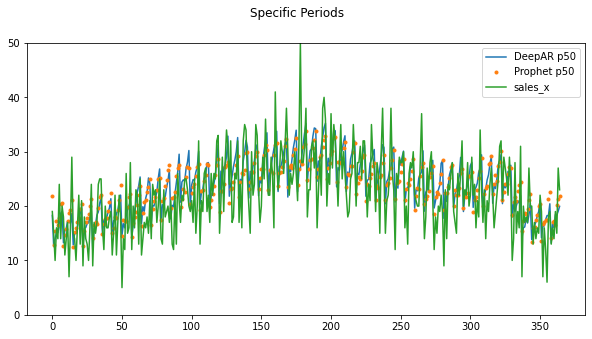

In [199]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1[['DeepAR p50','Prophet p50','sales_x']].plot(ax=ax, style=['-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Specific Periods')

In [200]:
df_test_final_1_1_Jan.head(2)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,19,13.092031,18.273352,23.108099,14.481007,21.839976,26.572280,15.038474,21.083323,27.128171
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647,6.287601,12.369299,18.450996


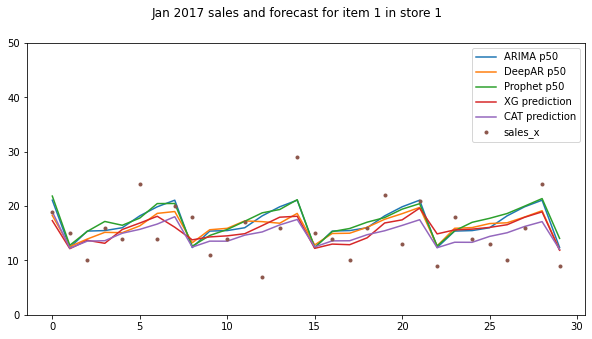

In [201]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1_Jan[['ARIMA p50', 'DeepAR p50','Prophet p50','XG prediction', 'CAT prediction','sales_x']].plot(ax=ax, style=['-','-','-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Jan 2017 sales and forecast for item 1 in store 1')

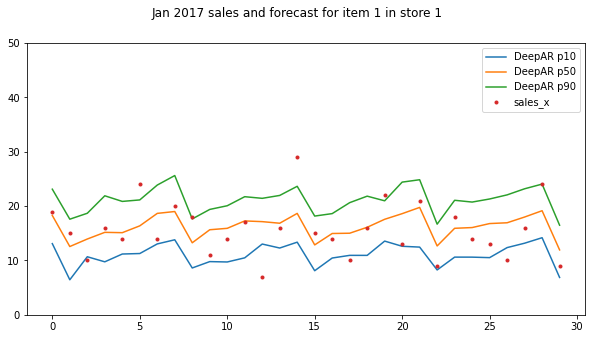

In [202]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1_Jan[['DeepAR p10' ,'DeepAR p50', 'DeepAR p90','sales_x']].plot(ax=ax, style=['-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Jan 2017 sales and forecast for item 1 in store 1')

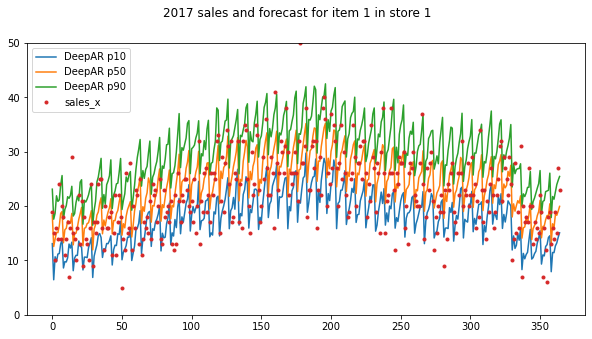

In [203]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1[['DeepAR p10' ,'DeepAR p50', 'DeepAR p90','sales_x']].plot(ax=ax, style=['-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('2017 sales and forecast for item 1 in store 1')

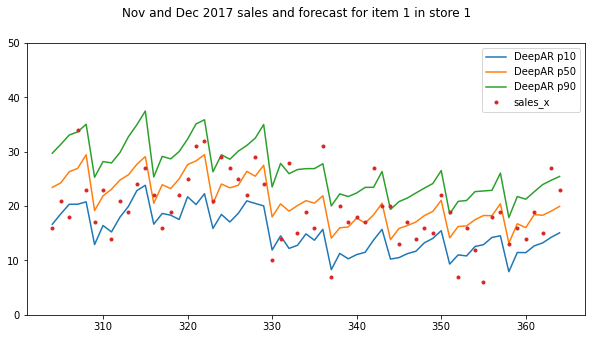

In [204]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1_NovDec[['DeepAR p10' ,'DeepAR p50', 'DeepAR p90','sales_x']].plot(ax=ax, style=['-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Nov and Dec 2017 sales and forecast for item 1 in store 1')

In [205]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
125843,2017-10-11,5,35,53,35-5,11,56.428571,49.743843,53,3.256157,...,53,46.344650,53.814766,64.297073,43.091752,51.778842,63.280239,6.936634,35.251334,63.566033
159321,2017-07-01,7,44,38,44-7,1,30.571429,28.128260,38,9.871740,...,38,26.640066,34.247574,42.686928,24.501023,30.718432,37.123820,7.403915,18.931455,30.458994
63240,2017-04-06,4,18,119,18-4,6,103.142857,97.708183,119,21.291817,...,119,90.908897,104.178024,121.825516,91.084248,104.070037,114.700675,47.053231,76.023447,104.993664
90517,2017-12-29,8,25,87,25-8,29,85.285714,89.015656,87,-2.015656,...,87,76.877457,89.965279,101.927017,84.828727,96.558148,109.810228,30.691576,87.328399,143.965222
139177,2017-04-23,2,39,83,39-2,23,70.142857,80.306641,83,2.693359,...,83,72.722794,83.456985,93.525803,69.871973,81.458421,89.871565,38.055899,57.969016,77.882133


In [237]:
df_test_final_7days = df_test_final[(df_test_final.date>'2017-01-01')]

In [238]:
df_test_final_7days = df_test_final_7days[(df_test_final_7days.date<'2017-01-08')]

In [239]:
df_test_final_7days.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
1,2017-01-02,1,1,15,1-1,2,17.0,12.165764,15,2.834236,...,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647,6.287601,12.369299,18.450996
2,2017-01-03,1,1,10,1-1,3,17.0,13.705684,10,-3.705684,...,10,10.678741,13.940229,18.678812,9.756908,15.349970,20.506746,9.281922,15.400247,21.518572
3,2017-01-04,1,1,16,1-1,4,17.0,13.153199,16,2.846801,...,16,9.747601,15.168463,21.893089,10.321535,17.171180,23.340119,9.338442,15.493176,21.647910
4,2017-01-05,1,1,14,1-1,5,16.0,15.693301,14,-1.693301,...,14,11.181156,15.107273,20.859018,10.991293,16.469481,21.002746,9.825613,16.016542,22.207471
5,2017-01-06,1,1,24,1-1,6,16.0,16.877367,24,7.122633,...,24,11.271238,16.362965,21.133337,11.722342,17.795096,23.035054,11.975618,18.202532,24.429445


In [209]:
RMSE_7_days_deep_AR  = np.mean(np.sqrt((df_test_final_7days['DeepAR p50'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_deep_AR)

5.319739441395154


In [210]:
RMSE_7_days_Prophet  = np.mean(np.sqrt((df_test_final_7days['Prophet p50'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_Prophet)

6.292679474933353


In [ ]:
RMSE_7_days_Prophet  = np.mean(np.sqrt((df_test_final_7days['Prophet p50'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_Prophet)

In [241]:
RMSE_7_days_Cat  = np.mean(np.sqrt((df_test_final_7days['CAT prediction'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_Cat)

4.898540760934977


# Covert to By Day

In [211]:
df_test_final_new = df_test_final.copy()

In [212]:
df_test_final_new['date'] =  pd.to_datetime(df_test_final_new['date'])

In [213]:
df_test_final_new = df_test_final_new.set_index('date')

In [214]:
DailyFinal = df_test_final_new.resample('D').sum()

In [215]:
DailyFinal.head()

,store,item,sales_x,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,abs_error,abs_error_percent,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2750,12750,23709,500,20948.571429,23734.595703,23709,-25.596003,2237.834454,5744.420701,...,23709,20845.143443,24995.135345,29277.705356,22441.241487,27040.152381,31564.281367,21317.346916,26395.786363,31474.225811
2017-01-02,2750,12750,15772,1000,20797.285714,15579.737305,15772,192.262394,2287.745081,8985.285358,...,15772,13344.722430,16968.554532,20648.412032,12631.943799,17202.684506,21552.209324,10420.207857,15571.647814,20723.087770
2017-01-03,2750,12750,18650,1500,20698.571429,18212.845703,18650,437.153700,2485.914135,7746.746949,...,18650,16018.456459,19640.363884,23519.778728,15845.611454,20395.838818,24861.573159,13927.467912,19143.684017,24359.900122
2017-01-04,2750,12750,18510,2000,20548.571429,18234.355469,18510,275.644270,2399.896362,7854.869655,...,18510,15957.582680,19732.617101,23640.794652,15785.972275,20535.728854,25035.820022,13910.142204,19191.218403,24472.294602
2017-01-05,2750,12750,19895,2500,20374.857143,19233.876953,19895,661.122218,2554.950562,7452.685144,...,19895,16997.674589,20919.546168,24957.955253,17351.235026,22033.378841,26531.375836,15579.229621,20924.071941,26268.914260


In [216]:
RMSE_daily_deep_AR  = np.mean(np.sqrt((DailyFinal['DeepAR p50'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_deep_AR)

1375.3464340209562


In [217]:
RMSE_daily_XG  = np.mean(np.sqrt((DailyFinal['XG prediction'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_XG)

925.5588051155822


In [218]:
RMSE_daily_Prophet  = np.mean(np.sqrt((DailyFinal['Prophet p50'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_Prophet)

1552.173645537604


In [236]:
RMSE_daily_CAT  = np.mean(np.sqrt((DailyFinal['CAT prediction'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_CAT)

862.2341893848537


# Monthly Final

In [219]:
MonthlyFinal = df_test_final_new.resample('M').sum()

In [220]:
MonthlyFinal.head()

,store,item,sales_x,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,abs_error,abs_error_percent,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,85250,395250,617306,248000,6.228956e+05,600890.3125,617306,16415.706628,78218.199347,236047.073807,...,617306,533284.839743,6.532261e+05,7.787254e+05,553948.207287,6.961580e+05,8.348097e+05,469629.723187,654863.782319,840097.841451
2017-02-28,77000,357000,621369,203000,6.146851e+05,603874.0625,621369,17494.941125,75800.771131,204616.459617,...,621369,543259.120120,6.612705e+05,7.832739e+05,556977.027785,6.854281e+05,8.110163e+05,385112.874123,593731.187378,802349.500633
2017-03-31,85250,395250,822667,248000,8.106400e+05,799957.9375,822667,22709.043805,93195.492381,207961.397427,...,822667,719122.079740,8.619949e+05,1.012475e+06,728996.996584,8.710451e+05,1.009763e+06,387976.460982,656565.072722,925153.684462
2017-04-30,82500,382500,938862,232500,9.160630e+05,907294.3750,938862,31567.639539,99604.185193,183154.167318,...,938862,823345.272329,9.734426e+05,1.127310e+06,823865.051395,9.623123e+05,1.096818e+06,351790.093710,644573.701248,937357.308786
2017-05-31,85250,395250,1020686,248000,1.025612e+06,987380.1250,1020686,33305.865731,103873.966281,181902.576441,...,1020686,910451.932504,1.067575e+06,1.228743e+06,896670.736596,1.038850e+06,1.177602e+06,314604.656210,647586.812115,980568.968020


In [233]:
MonthlyFinal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store              12 non-null     int64  
 1   item               12 non-null     int64  
 2   sales_x            12 non-null     int64  
 3   dayofmonth_x       12 non-null     int64  
 4   Mean_Amount_7D     12 non-null     float64
 5   XG prediction      12 non-null     float32
 6   sales_y            12 non-null     int64  
 7   error              12 non-null     float64
 8   abs_error          12 non-null     float64
 9   abs_error_percent  12 non-null     float64
 10  dayofweek          12 non-null     int64  
 11  quarter            12 non-null     int64  
 12  month              12 non-null     int64  
 13  year               12 non-null     int64  
 14  dayofyear          12 non-null     int64  
 15  dayofmonth_y       12 non-null     int64  
 16  

In [221]:
RMSE_monthly_deep_AR  = np.mean(np.sqrt((MonthlyFinal['DeepAR p50'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_deep_AR)

38993.673132101605


In [222]:
RMSE_monthly_XG  = np.mean(np.sqrt((MonthlyFinal['XG prediction'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_XG)

28128.223958333332


In [223]:
RMSE_monthly_Prophet  = np.mean(np.sqrt((MonthlyFinal['Prophet p50'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_Prophet)

36172.03079102817


In [235]:
RMSE_monthly_CAT  = np.mean(np.sqrt((MonthlyFinal['CAT prediction'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_CAT)

26125.63541396383


# Group by Store

In [224]:
df_test_final.sample(10)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
5600,2017-05-06,6,2,83,2-6,6,57.142857,57.236187,83,25.763813,...,83,58.106716,66.473579,76.530075,49.806608,59.351966,68.393450,27.226706,42.799070,58.371434
73808,2017-03-20,3,21,37,21-3,20,48.285714,37.829994,37,-0.829994,...,37,31.427261,38.219566,46.514244,32.626432,40.446583,49.367188,10.716439,26.273430,41.830421
86740,2017-08-24,8,24,86,24-8,24,98.857143,96.317749,86,-10.317749,...,86,95.190933,108.823364,122.630249,90.669848,103.949333,115.582837,23.762537,63.675787,103.589037
24180,2017-04-01,7,7,53,7-7,1,40.428571,48.523331,53,4.476669,...,53,42.912598,52.360798,63.425133,41.159823,50.641192,57.248983,24.649558,39.165207,53.680856
151890,2017-02-20,7,42,13,42-7,20,18.285714,19.044779,13,-6.044779,...,13,11.975835,18.104486,23.781296,12.448273,18.741715,25.095923,9.296460,18.248648,27.200836
59904,2017-02-14,5,17,22,17-5,14,21.857143,19.780930,22,2.219070,...,22,15.813984,20.877274,26.027054,15.185237,22.154348,28.026838,8.526864,17.303144,26.079423
31019,2017-12-26,5,9,29,9-5,26,31.571429,30.701054,29,-1.701054,...,29,25.644808,33.391312,40.743423,24.282394,33.611862,41.127626,6.542697,30.328432,54.114168
92012,2017-02-02,3,26,47,26-3,2,38.000000,42.803909,47,4.196091,...,47,41.593384,50.000450,58.292484,39.736849,47.246816,57.335834,29.093984,43.933247,58.772511
50371,2017-01-02,9,14,34,14-9,2,50.714286,38.407658,34,-4.407658,...,34,31.819851,38.327782,46.178036,30.543949,40.851979,50.880167,25.391078,37.038711,48.686344
84279,2017-11-26,1,24,90,24-1,26,68.000000,83.972710,90,6.027290,...,90,68.323898,80.580833,91.252197,71.354990,79.718274,90.301867,29.108651,61.442995,93.777340


In [225]:
Store_Month_Test_Final = df_test_final_new.groupby(['store']).resample('M').sum()

In [254]:
Store_Month_Test_Final.tail(10)

store   item  sales_x  dayofmonth_x  Mean_Amount_7D  \
store date                                                              
10    2017-03-31  15500  39525    92660         24800    91191.428571   
      2017-04-30  15000  38250   106010         23250   103353.714286   
      2017-05-31  15500  39525   114351         24800   115146.714286   
      2017-06-30  15000  38250   119125         23250   118068.571429   
      2017-07-31  15500  39525   131638         24800   130340.142857   
      2017-08-31  15500  39525   115528         24800   117636.714286   
      2017-09-30  15000  38250   104924         23250   105213.571429   
      2017-10-31  15500  39525    99969         24800   101111.000000   
      2017-11-30  15000  38250   103815         23250   103232.428571   
      2017-12-31  15500  39525    77850         24800    79868.285714   

                  XG prediction  sales_y        error     abs_error  \
store date                                                            
10    2017-03-31   90769.914062    92660  1890.088785  10101.385977   
      2017-04-30  103197.789062   106010  2812.210499  10808.046265   
      2017-05-31  112384.179688   114351  1966.819807  11075.320387   
      2017-06-30  116508.625000   119125  2616.372839  10964.296309   
      2017-07-31  128270.195312   131638  3367.807533  12208.057545   
      2017-08-31  112731.750000   115528  2796.252895  10864.221317   
      2017-09-30  102214.718750   104924  2709.283342  10117.507856   
      2017-10-31   98586.734375    99969  1382.267706   9890.347738   
      2017-11-30  101843.375000   103815  1971.624563  10320.696218   
      2017-12-31   76624.914062    77850  1225.086455   8962.376428   

                  abs_error_percent  ...   sales     DeepAR p10  \
store date                           ...                          
10    2017-03-31       19238.155959  ...   92660   81349.777073   
      2017-04-30       17184.077596  ...  106010   93231.844699   
      2017-05-31       17129.615145  ...  114351  103159.875446   
      2017-06-30       15369.604418  ...  119125  109200.328800   
      2017-07-31       16344.520208  ...  131638  117298.576929   
      2017-08-31       16285.321919  ...  115528  102638.884300   
      2017-09-30       16419.607199  ...  104924   93659.832050   
      2017-10-31       17546.079768  ...   99969   90071.026391   
      2017-11-30       16908.141752  ...  103815   89345.958596   
      2017-12-31       20454.019326  ...   77850   67266.631374   

                     DeepAR p50     DeepAR p90    Prophet p10    Prophet p50  \
store date                                                                     
10    2017-03-31   96662.920946  112709.274252   82643.392172   97781.926424   
      2017-04-30  109278.379477  125611.903063   93167.652151  107957.105139   
      2017-05-31  119937.446098  137122.025343  101726.936507  116918.814032   
      2017-06-30  125680.229891  142802.838535  105795.222248  120452.881042   
      2017-07-31  135562.108982  154463.331270  115166.145999  130332.581962   
      2017-08-31  120734.015291  139101.131012  102478.908592  117639.435718   
      2017-09-30  110002.043329  126807.284760   93033.870725  107701.731945   
      2017-10-31  106279.553680  123126.349306   89794.988296  104982.571504   
      2017-11-30  105183.333399  121365.554955   91140.454619  105923.456127   
      2017-12-31   81642.585665   96400.306601   71948.762458   87132.636547   

                    Prophet p90     ARIMA p10     ARIMA p50      ARIMA p90  
store date                                                                  
10    2017-03-31  112592.861416  44022.515154  73616.535823  103210.556491  
      2017-04-30  122397.234755  39892.123207  72266.441676  104640.760144  
      2017-05-31  131803.113305  35701.670235  72606.494857  109511.319478  
      2017-06-30  134846.070771  32697.414258  71464.236187  110231.058116  
      2017-07-31  145221.920284  31026.869202  74006.741467 

In [ ]:
#RMSE_Store_item_XG  = np.mean(np.sqrt((Store_item_Month_Test_Final['XG prediction'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
#print(RMSE_Store_item_XG)

In [255]:
RMSE_Store_Month_deep_AR  = np.mean(np.sqrt((Store_Month_Test_Final['DeepAR p50'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_deep_AR)

3899.3673132101026


In [256]:
RMSE_Store_Month_XG  = np.mean(np.sqrt((Store_Month_Test_Final['XG prediction'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_XG)

2812.8211263020835


In [257]:
RMSE_Store_Month_Prophet  = np.mean(np.sqrt((Store_Month_Test_Final['Prophet p50'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_Prophet)

3617.20307910277


In [258]:
RMSE_Store_Month_Cat  = np.mean(np.sqrt((Store_Month_Test_Final['CAT prediction'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_Cat)

2612.5635413963214


In [259]:
Store_Month_Test_Final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 120 entries, (1, Timestamp('2017-01-31 00:00:00', freq='M')) to (10, Timestamp('2017-12-31 00:00:00', freq='M'))
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store              120 non-null    int64  
 1   item               120 non-null    int64  
 2   sales_x            120 non-null    int64  
 3   dayofmonth_x       120 non-null    int64  
 4   Mean_Amount_7D     120 non-null    float64
 5   XG prediction      120 non-null    float32
 6   sales_y            120 non-null    int64  
 7   error              120 non-null    float64
 8   abs_error          120 non-null    float64
 9   abs_error_percent  120 non-null    float64
 10  dayofweek          120 non-null    int64  
 11  quarter            120 non-null    int64  
 12  month              120 non-null    int64  
 13  year               120 non-null    int64  
 14  dayofyear          120 non-null

# By Store by Item

In [243]:
Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()

In [246]:
Store_item_Month_Test_Final.head()

store  item  sales_x  dayofmonth_x  Mean_Amount_7D  \
store item date                                                             
1     1    2017-01-31     31    31      485           496      491.857143   
           2017-02-28     28    28      487           406      476.714286   
           2017-03-31     31    31      561           496      569.857143   
           2017-04-30     30    30      677           465      638.142857   
           2017-05-31     31    31      773           496      789.571429   

                       XG prediction  sales_y      error   abs_error  \
store item date                                                        
1     1    2017-01-31     480.415405      485   4.584588  113.010289   
           2017-02-28     478.297363      487   8.702642  101.919601   
           2017-03-31     634.498413      561 -73.498442  132.310270   
           2017-04-30     730.647583      677 -53.647593  111.199274   
           2017-05-31     789.250671      773 -16.250690  144.276684   

                       abs_error_percent  ...  sales  DeepAR p10  DeepAR p50  \
store item date                           ...                                  
1     1    2017-01-31         824.910217  ...    485  342.879231  501.820342   
           2017-02-28         728.175514  ...    487  363.522437  509.009387   
           2017-03-31         848.498545  ...    561  495.013380  671.248390   
           2017-04-30         559.022302  ...    677  568.808999  758.697426   
           2017-05-31         651.414087  ...    773  630.302674  831.289663   

                        DeepAR p90  Prophet p10  Prophet p50  Prophet p90  \
store item date                                                             
1     1    2017-01-31   652.780518   366.030498   533.526538   701.115136   
           2017-02-28   663.955324   357.975261   518.578700   664.407788   
           2017-03-31   861.033880   505.976882   676.364568   841.408395   
           2017-04-30   950.430103   576.130601   731.378170   890.925884   
           2017-05-31  1038.301241   618.803104   792.000923   958.387348   

                        ARIMA p10   ARIMA p50   ARIMA p90  
store item date                                            
1     1    2017-01-31  318.955514  522.590876  726.226238  
           2017-02-28  263.519267  473.738008  683.956748  
           2017-03-31  264.921146  523.450258  781.979369  
           2017-04-30  241.063079  514.690714  788.318348  
           2017-05-31  211.963423  517.000729  822.038036  

[5 rows x 28 columns]

In [252]:
RMSE_Store_item_Month_deep_AR  = np.mean(np.sqrt((Store_item_Month_Test_Final['DeepAR p50'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_Month_deep_AR)

81.4978496665931


In [248]:
RMSE_Store_item_XG  = np.mean(np.sqrt((Store_item_Month_Test_Final['XG prediction'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_XG)

71.56527725728353


In [251]:
RMSE_Store_item_Month_Prophet  = np.mean(np.sqrt((Store_item_Month_Test_Final['Prophet p50'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_Month_Prophet)

84.6051484240234


In [250]:
RMSE_Store_item_Month_Cat  = np.mean(np.sqrt((Store_item_Month_Test_Final['CAT prediction'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_Month_Cat)

70.44702874213833


# Final Results

In [231]:
print(color.BOLD +"RMSE ")
print ('\033[0m')

print("Root Mean Squared Error -RMSE")
print("RMSE Prophet",Prophet_Results['RMSE'])
print("RMSE DeepAR_Results",DeepAR_Results['RMSE'])  # Therse result are terribe as the forecast is completely awful ()
print("RMSE XG Boost",XG_Results['RMSE'])
print("RMSE ARIMA",ARIMA_Results['RMSE'])
print("RMSE AUTO",Auto_Results['RMSE'])
print("RMSE",CAT_Results['RMSE'])

RMSE 

Root Mean Squared Error -RMSE
RMSE Prophet 6.855061314747093
RMSE DeepAR_Results 6.503165773412618
RMSE XG Boost 6.313282440530437
RMSE ARIMA 17.779052079415543
RMSE AUTO 559.2934381591924
RMSE 6.285698783697764


In [229]:
df_test_final.sum()

store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                             1.07263e+07
XG prediction                                              1.03962e+07
sales_y                                                       10733740
error                                                           337539
abs_error                                                  1.15217e+06
abs_error_percent                                          2.31512e+06
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [230]:
df_test.sum()

store                                                          1003750
item                                                           4653750
sales                                                         10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year                                                         368102500
dayofyear                                                     33397500
dayofmonth                                                     2869000
weekofyear                                                     4849000
dtype: object